## import Libraries

In [49]:
import pandas as pd
import numpy as np 
import seaborn as se
import matplotlib.pyplot as plt

# import csv file to the memory

In [50]:
data=pd.read_csv('uber-raw-data-aug14.csv')

In [51]:
print(data.head())

          Date/Time      Lat      Lon    Base
0  8/1/2014 0:03:00  40.7366 -73.9906  B02512
1  8/1/2014 0:09:00  40.7260 -73.9918  B02512
2  8/1/2014 0:12:00  40.7209 -74.0507  B02512
3  8/1/2014 0:12:00  40.7387 -73.9856  B02512
4  8/1/2014 0:12:00  40.7323 -74.0077  B02512


# convert datetime and add some useful columns

In [52]:
data['Date/Time']=data['Date/Time'].map(pd.to_datetime)

In [53]:
def dom(data):
    return data.day

def week(data):
    return data.weekday()

def hour(data):
    return data.hour

In [54]:
data['dom']=data['Date/Time'].map(dom)
data['week']=data['Date/Time'].map(week)
data['hour']=data['Date/Time'].map(hour)

In [55]:
print(data.head())

            Date/Time      Lat      Lon    Base  dom  week  hour
0 2014-08-01 00:03:00  40.7366 -73.9906  B02512    1     4     0
1 2014-08-01 00:09:00  40.7260 -73.9918  B02512    1     4     0
2 2014-08-01 00:12:00  40.7209 -74.0507  B02512    1     4     0
3 2014-08-01 00:12:00  40.7387 -73.9856  B02512    1     4     0
4 2014-08-01 00:12:00  40.7323 -74.0077  B02512    1     4     0


#  analysis

Text(0.5, 1.0, 'Frequency by Dom-Uber-Apr 2014')

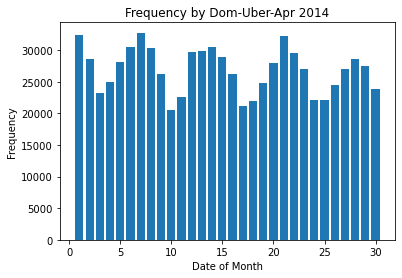

In [56]:
plt.hist(data.dom,bins=30,rwidth=0.8,range=(0.5,30.5))
plt.xlabel('Date of Month')
plt.ylabel('Frequency')
plt.title('Frequency by Dom-Uber-Apr 2014')

In [57]:
d=data.groupby('dom')

In [58]:
d.first()

,Date/Time,Lat,Lon,Base,week,hour
dom,,,,,,
1,2014-08-01 00:03:00,40.7366,-73.9906,B02512,4,0
2,2014-08-02 00:01:00,40.7402,-74.0058,B02512,5,0
3,2014-08-03 00:03:00,40.7488,-74.0273,B02512,6,0
4,2014-08-04 00:03:00,40.7277,-73.9981,B02512,0,0
5,2014-08-05 00:09:00,40.7640,-73.9731,B02512,1,0
6,2014-08-06 00:15:00,40.7408,-74.0054,B02512,2,0
7,2014-08-07 00:03:00,40.7455,-73.9895,B02512,3,0
8,2014-08-08 00:01:00,40.7241,-74.0032,B02512,4,0
9,2014-08-09 00:00:00,40.7107,-73.9364,B02512,5,0


In [59]:
def count_rows(data):
    return len(data)


In [60]:
by_date=data.groupby('dom').apply(count_rows)

In [61]:
by_date

dom
1     32353
2     28678
3     23146
4     24952
5     28094
6     30495
7     32759
8     30411
9     26286
10    20584
11    22632
12    29646
13    29788
14    30457
15    28974
16    26234
17    21209
18    21956
19    24834
20    27955
21    32304
22    29512
23    27097
24    22036
25    22093
26    24550
27    27018
28    28597
29    27424
30    23930
31    23271
dtype: int64

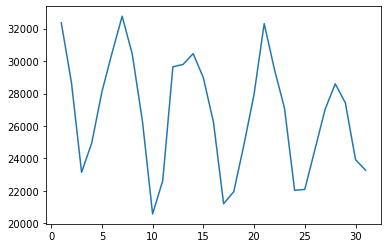

In [62]:
plt.plot(by_date)

In [63]:
by_date_sorted=by_date.sort_values()

In [64]:
by_date_sorted

dom
10    20584
17    21209
18    21956
24    22036
25    22093
11    22632
3     23146
31    23271
30    23930
26    24550
19    24834
4     24952
16    26234
9     26286
27    27018
23    27097
29    27424
20    27955
5     28094
28    28597
2     28678
15    28974
22    29512
12    29646
13    29788
8     30411
14    30457
6     30495
21    32304
1     32353
7     32759
dtype: int64

# analysis hours

(array([ 34952.,  28299.,  58971.,  95467.,  63884.,  76408., 158800.,
        108398., 103028.,  79617.]),
 array([ 0.8 ,  3.12,  5.44,  7.76, 10.08, 12.4 , 14.72, 17.04, 19.36,
        21.68, 24.  ]),
 <BarContainer object of 10 artists>)

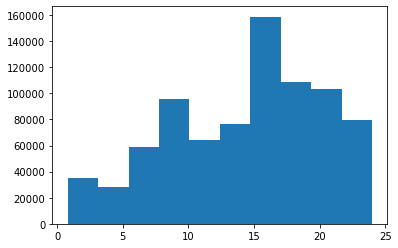

In [65]:
plt.hist(data.hour,range=(0.8,24))

# analysis Weeks

(array([ 91633., 107124., 115256., 124117., 148674., 132225., 110246.]),
 array([-0.5       ,  0.42857143,  1.35714286,  2.28571429,  3.21428571,
         4.14285714,  5.07142857,  6.        ]),
 <BarContainer object of 7 artists>)

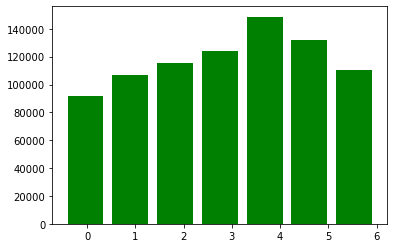

In [66]:
plt.hist(data.week,bins=7,range=(-.5,6),rwidth=0.8,color='green')

# cross analysis (hour/dow)

by_cross=data.groupby('week hour'.split()).apply(count_rows).unstack()

<AxesSubplot:xlabel='hour', ylabel='week'>

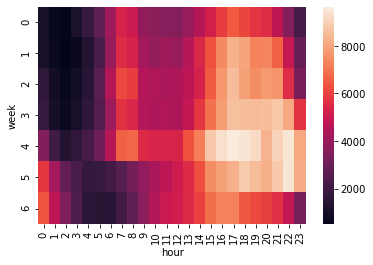

In [67]:
se.heatmap(by_cross)

# by lat and lon

''

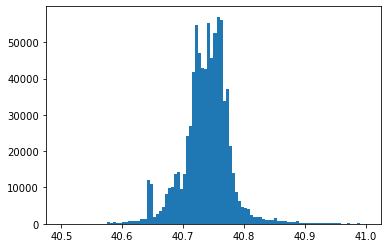

In [68]:
plt.hist(data['Lat'],bins=100,range=(40.5,41))
;

In [69]:
print(data.head())

            Date/Time      Lat      Lon    Base  dom  week  hour
0 2014-08-01 00:03:00  40.7366 -73.9906  B02512    1     4     0
1 2014-08-01 00:09:00  40.7260 -73.9918  B02512    1     4     0
2 2014-08-01 00:12:00  40.7209 -74.0507  B02512    1     4     0
3 2014-08-01 00:12:00  40.7387 -73.9856  B02512    1     4     0
4 2014-08-01 00:12:00  40.7323 -74.0077  B02512    1     4     0


In [ ]:
plt.hist(data['Lon'],bins=100,range=(-74.1,-73.9),color='g',alpha=.5).twiny()
plt.hist(data['Lat'],bins=100,range=(40.5,41),color='r',alpha=.5)
;


(0.0, 100.0)

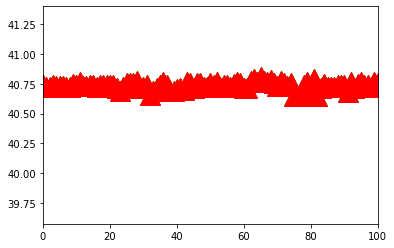

In [95]:
plt.plot(data['Lat'],'^',ms=20,color='green',label='Lat')
plt.plot(data['Lat'],'^',ms=20,color='red',label='Lon')
plt.xlim(0,100)

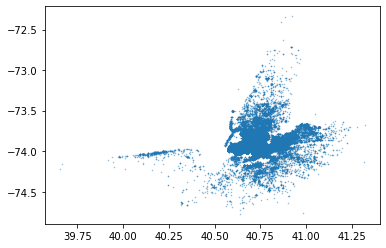

In [104]:
plt.plot(data['Lat'],data['Lon'],'.',ms=1,alpha=.5)